# Mise en oeuvre de l'algorithme EM

<font color='blue'>Ce travail a pour objectif de manipuler l'algorithme EM et d'en voir l'intérêt pratique dans le cadre des mélange gaussiens.</font>

## <font color="green">Calcul de la valeur de la densité de probabilité d'un mélange de gaussienne en un point</font>
### Les paramétres de la fonction gm_pdf
<ul>
<li>x : le point où l'on calcule la valeur de la densitè</li>
<li>mu : le vecteur des moyennes des gaussiennes</li>
<li>sigma : le vecteur des écart-types des gaussiennes</li>
<li>p : le vecteur des probabilitès de la loi multinomiale associèe</li>
</ul>

In [16]:
import numpy as np
from scipy.stats import norm, stats
from scipy.stats import uniform
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

In [2]:
def gm_pdf(x, mu, sigma, p):
    #Initialisation de la variable de sortie
    resultat = 0.0
    #Contrôle de la cohérence des paramètres d'entrée
    #Le vecteur de moyenne doit avoir la même longueur que le vecteur p
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
    # Le vecteur des écart-types doit avoir la même longueur que le vecteur p
    elif len(sigma) != len(p):
            print('Erreur de dimension sur les écarts-types')
    else:
    # Calcul de la valeur de la densité
        for i in range(0, len(p)):
            resultat = resultat + p[i] * norm.pdf(x, mu[i], sigma[i])
    return resultat

In [3]:
p = np.array([0.2, 0.5, 0.3])
mu = np.array([-5.0, 0.0, 6.0])
sigma = np.array([1.0, 0.5, 1.0])
x = np.arange(-20,20, 0.001)

## <font color="green">Génération de nombre aléatoire suivant un mélange de gaussienne</font>
Dans un mélange de gaussienne chaque densité de probabilité correspondant à une loi normale est pondérée par un coefficient plus petit que un.
La somme de tous ces coefficients est égale à un. Une variable aléatoire qui suit une loi normale suit donc une des lois normales du mélange avec une probabilité égale au coefficient de pondération de cette même loi normale. Pour générer un échantillon suivant une loi normale, il faut donc procéder en deux étapes :
<ol>
<li>Tirer aléatoirement un nombre entre 1 et N (le nombre de gaussiennes du mélange) suivant une loi mumltinomiale définie par les coefficients du mélange.</li>
<li>Une fois ce nombre obtenu, on génère le nombre suivant la loi normale associée.</li>
</ol>
### Les paramètres de la fonction gm_rnd
<ul>
<li>mu : le vecteur des moyennes des gaussiennes</li>
<li>sigma : le vecteur des écart-types des gaussiennes</li>
<li>p : le vecteur des probabilités de la loi multinomiale associée</li>
</ul>

In [4]:
def gm_rnd(mu, sigma, p):
    # Initialisation de la variable de sortie
    resultat = 0.0
    #Contrôle de la cohérence des paramètres d'entrée
    #Le vecteur de moyenne doit avoir la même longueur que le vecteur p
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
    # Le vecteur des écart-types doit avoir la même longueur que le vecteur p
    elif len(sigma) != len(p):
            print('Erreur de dimension sur sur les écarts-types')
    else:
    #Génération de l'échantillon
    # On échantillonne suivant une loi uniforme sur [0,1]
        u = uniform.rvs(loc = 0.0, scale = 1.0, size = 1)
    # % Chaque test suivant permet de définir un intervalle sur lequel la
    # probabilité d'appartenance de la variable uniforme est égale à l'une des
    # probabilités définie dans le vecteur p. Lorsque u appartient à l'un de
    # ces intervalles, c'est équivalent à avoir générer une variable aléatoire
    # suivant l'un des éléments de p. Par exemple, pour le premier test
    # ci-dessous, la probabilité que u appartienne à l'intervalle [0,p[0][ est
    # égale à p[0] puisque u suit une loi uniforme. Donc si u appartient à
    # [0,p[0][ cela est équivalent à avoir tirer suivant l'événement de probabilité p[0].
    ##Me: Can I do better (generate directely the u by the distribution p)
        if u < p[0]: # On test si on a généré un événement de probabilité p[0]
            resultat = sigma[0] * norm.rvs(loc = 0, scale = 1, size = 1) + mu[0]
            # Pour générer suivant une loi normale quelconque, il suffit de multiplier
            # une variable normale centrée réduite (moyenne nulle et écart-type égal à 1)
            # par l'écart-type désité et d'additionner la moyenne désirée au produit précédent.
        for i in range(1, len(p)):
            if (u > np.sum(p[0:i])) and (u <= np.sum(p[0:i+1])): # On test si on a généré
                # un événement de probabilité p[i]
                resultat = sigma[i] * norm.rvs(loc = 0.0, scale = 1.0, size = 1) + mu[i]
                # Pour générer suivant une loi normale quelconque, il suffit de multiplier
                # une variable normale centrée réduite (moyenne nulle et écart-type égal à 1)
                # par l'écart-type désité et d'additionner la moyenne désirée au produit précédent.
    return resultat

### Les paramètres de la densité de mélange de gaussienne

In [56]:
p = np.array([0.2, 0.5, 0.3])
mu = np.array([-5.0, 0.0, 6.0])
sigma = np.array([1.0, 0.5, 1.0])

### Calcul de la densité de probabilité du mélange de gaussienne

In [57]:
x = np.arange(-20,20, 0.001)
pointPdf = gm_pdf(x, mu, sigma, p)

### Tracé de la densité de probabilité du mélange de gaussienne

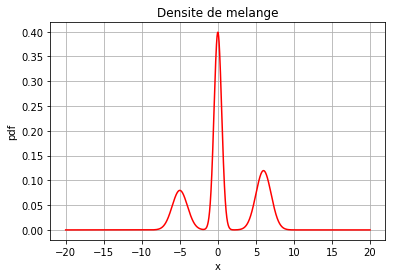

In [58]:
plt.plot(x, pointPdf, 'r-')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')
plt.grid()
plt.show()

### Génération d'échantillons suivant  densité de probabilité du mélange de gaussienne

In [59]:
nbEchantillon = 81
donnees = np.array(nbEchantillon*[0],dtype = float)
for i in range(0, nbEchantillon, 1):
    donnees[i] = gm_rnd(mu, sigma, p)

### Tracé des échantillons 

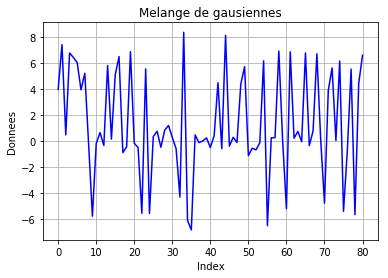

In [60]:
plt.plot(donnees, 'b')
plt.title('Melange de gausiennes')
plt.xlabel('Index')
plt.ylabel('Donnees')
plt.grid()
plt.show()

### Tracé des échantillons

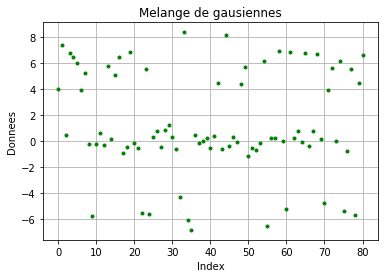

In [61]:
plt.plot(donnees, 'g.')
plt.title('Melange de gausiennes')
plt.xlabel('Index')
plt.ylabel('Donnees')
plt.grid()
plt.show()

### Tracé de l'histogramme des échantillons

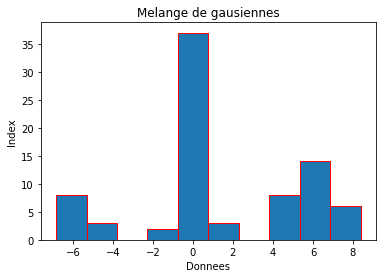

In [62]:
plt.hist(donnees, bins = 10, normed = False, edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('Donnees')
plt.ylabel('Index')
plt.show()

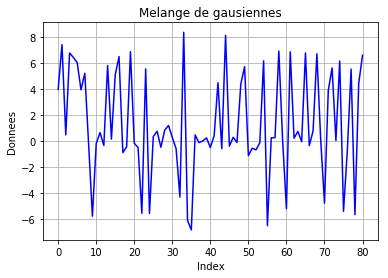

In [63]:
plt.plot(donnees, 'b')
plt.title('Melange de gausiennes')
plt.xlabel('Index')
plt.ylabel('Donnees')
plt.grid()
plt.show()

### Tracé de l'histogramme des échantillons

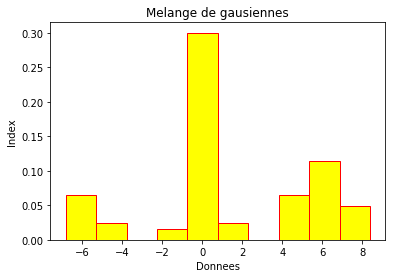

In [64]:
plt.hist(donnees, bins = 10, normed = True, color = 'yellow', edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('Donnees')
plt.ylabel('Index')
plt.show()

## <font color="green">Dans cette partie, on applique l'algorithme EM aux données sur les Galaxies :</font>

#### Pour utiliser l'algorithme EM, on peut itérer chaque fois sur le nombre des composante gaussiennes et voir les résultats obtenus. Celà permettra d'avoir une idées sur les composantes gaussiennes, mais manquera de réalisme, parce qu'on ne prend pas en considération la distribution des données dans le choix des $\mu_i \; et \; \sigma_i$.

- #### Dans un premier temps, on va essayer une initialisation aléatoire, qui ne se base pas sur la distribution des données.
- #### Dans un deuxième temps, nous allons estimer les paramètres d'initialisation à travers un "clustering" des données en utilisant l'algorithme "K-means".
- #### Ensuite, nous allons faire une étude descriptive de la distribution des données pour estimer les paramètres d'initialisation de l'algorithme EM.
- #### Enfin, nous allons utiliser l'algorithme EM de la bibliothèque "Sickit-learning" et exploiter les possibilités de sa paramétrisation afin d'améliorer la description des données et les comparer avec ce qu'on a obtenu comme résultat avec l'algorithme EM donnée.  


In [375]:
# Charger les données
donnees=pd.read_csv("Galaxy.csv", sep=',', names=["galaxies"]).values

- ### L'algorithme EM :

In [417]:
from copy import deepcopy
from scipy.misc import logsumexp


def algoEM(mu_init,sigma_init,alpha_init, nbMaxIterations=40):
    mu_em=deepcopy(mu_init)
    sigma_em=deepcopy(sigma_init)
    alpha_em=deepcopy(alpha_init)
    nbIteration = 1 #Initialisation de la variable d'arrêt
    nbComposante = len(alpha_em) #Nombre de composantes du mélange
    nbDonnees = len(donnees)  #Nombre de données

    p = np.zeros(shape=(nbComposante, nbDonnees))
    #Déclaration et initialisation de la matrice qui va contenir les probabilités
    #p(k|x,theta_courant)

    alpha_em_new = alpha_em
    sigma_em_carre_new = sigma_em
    mu_em_new = mu_em
    donneesP = np.zeros(shape=(len(donnees)))
    somme=0
    while nbIteration < nbMaxIterations:
        for n in range(0, nbDonnees, 1):
            for k in range(0, nbComposante, 1):
                p[k, n] = alpha_em[k] * norm.pdf(x = donnees[n], loc = mu_em[k], scale = sigma_em[k])
            p[:, n] = p[:, n] / np.sum(p[:, n])
        for k in range(0, nbComposante, 1):
            alpha_em_new[k] = np.sum(p[k,:]) / nbDonnees
            for n in range(0, nbDonnees, 1):
                donneesP[n] = donnees[n] * p[k, n]
            mu_em_new[k]  = np.sum(donneesP) / np.sum(p[k, :])
            for n in range(nbDonnees):
                donneesP[n] = ((donnees[n] - mu_em_new[k]) ** 2) * p[k, n]
            sigma_em_carre_new[k] = np.sum(donneesP) / np.sum(p[k, :])
        mu_em = mu_em_new
        sigma_em = np.sqrt(sigma_em_carre_new)
        alpha_em = alpha_em_new
        nbIteration = nbIteration + 1
    return mu_em,sigma_em,alpha_em

- <font color="blue"> On fait dans un premier une initialisation aléatoire des $\mu_i \; et \; \sigma_i$ pour voir le comporetement de l'algorithme EM vis à vis de celà.
    
    **N.B.** : **Quant au choix des valeurs initiales des poids, on n'a pas pris des valeurs qui sont tout à fait  arbitraires. Ce choix va être expliqué en bas dans la partie où on fait l'analyse descriptive des données**.</font>

Les paramètres estimés sont : 

Moyennes des composantes du mélange [19818 22892 19420]
Ecrat type des composantes du mélange [ 642.85074903 1112.73551816 8123.82710067]
Probabilités des composantes du mélange [0.37013927 0.36386256 0.26599817]

La somme des probabilités des composantes du mélange vaut :  0.9999999999999999


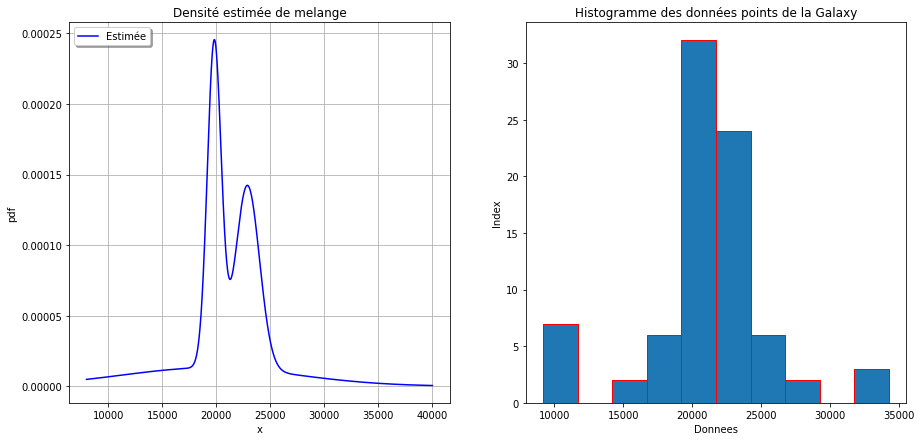

In [457]:
x = np.arange(8000,40000, 0.01)
mu_em_test = np.array([18000, 50000, 12000])
sigma_em_test = np.array([300, 2033, 803.33])
alpha_em_test = np.array([0.125, 0.75, 0.125])
mu_em,sigma_em,alpha_em=algoEM(mu_em_test,sigma_em_test,alpha_em_test, nbMaxIterations=1000)

print('Les paramètres estimés sont : ')
print('\nMoyennes des composantes du mélange', mu_em)
print('Ecrat type des composantes du mélange', sigma_em)
print('Probabilités des composantes du mélange', alpha_em)

print('\nLa somme des probabilités des composantes du mélange vaut : ', np.sum(alpha_em))

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Densité estimée de melange')
plt.xlabel('x')
plt.ylabel('pdf')
pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée')
plt.legend(loc='upper left', shadow=True)
plt.grid(True)
plt.subplot(122)
plt.hist(donnees, bins = 10, normed = False, edgecolor = "red")
plt.title('Histogramme des données points de la Galaxy')
plt.xlabel('Donnees')
plt.ylabel('Index')
plt.show()

### Commenatire du résultat :
Ayant généré la distribution donnée graçe à l'algorithme EM, on remarque que celle ci n'est pas proche de l'histogramme des données (qu'on aurait tendance à supposer représentatif de la distribution mère), ce qui éloigne la possibilité que les données de départ soient générer par la distribution calculée.

Ainsi, le choix aléatoire des données de départ fait biaiser l'algorithme EM et diverge de la vraie distribution générative des données.

- <font color="blue"> Une façon plus pour faire l'initialisation de notre algorithme EM est d'appliquer un algorithme de clustering comme "**K-Means**" sur les données pour estimer efficacement les $\mu_i \; et \; \sigma_i$ qu'on peut exploiter dans l'algorithme EM afin d'améliorer ses perfromances.</font>

In [420]:
# Ici on applique l'algorithme KMeans avec 3 clusters (car à partir de l'histogramme des données)
# Il nous donne en sortie, une fois entrainé sur les données, les moyennes estimées des clusters
# On calcule ainsi les écart types sur chacun des cluster pour en avoir une estimation initiale.
from sklearn.cluster import KMeans
X_train=donnees.reshape((len(donnees), 1))
k_means = KMeans(n_clusters=3, random_state=0).fit(X_train)
means=k_means.cluster_centers_
labels=k_means.labels_
sigmas=np.empty(0)
for k in [1,0,2]:
    cluster=np.array([donnees[i] for i in range(len(donnees)) if labels[i]==k])
    sigmas=np.append(sigmas, cluster.std())

Les paramètres estimés sont : 

Moyennes des composantes du mélange [21403.85059577 33044.38208903  9710.13923953]
Ecrat type des composantes du mélange [2203.8002345   921.71708864  422.50905437]
Probabilités des composantes du mélange [0.87805135 0.03658337 0.08536529]

La somme des probabilités des composantes du mélange vaut :  0.9999999999999999


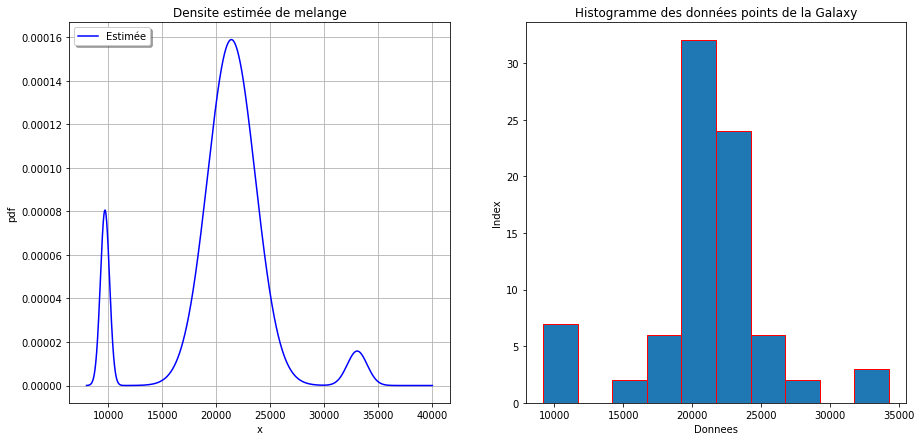

In [432]:
mu_em_kmeans=means.reshape((1,3))[0]
sigma_em_kmeans=sigmas
alpha_em_test = np.array([0.125, 0.75, 0.125])
mu_em,sigma_em,alpha_em=algoEM(mu_em_kmeans,sigma_em_kmeans,alpha_em_test, nbMaxIterations=100)

print('Les paramètres estimés sont : ')
print('\nMoyennes des composantes du mélange', mu_em)
print('Ecrat type des composantes du mélange', sigma_em)
print('Probabilités des composantes du mélange', alpha_em)

print('\nLa somme des probabilités des composantes du mélange vaut : ', np.sum(alpha_em))

plt.figure(figsize=(15,7))
# plt.subplot(121)
plt.title('Densité estimée de melange')
plt.xlabel('x')
plt.ylabel('pdf')
pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée')
plt.legend(loc='upper left', shadow=True)
plt.grid(True)
# plt.subplot(122)
plt.hist(donnees, bins = 10, normed = False, edgecolor = "red")
plt.title('Histogramme des données points de la Galaxy')
plt.xlabel('Donnees')
plt.ylabel('Index')
plt.show()

### Commenatire du résultat :
Contrairement à ce qu'on a vu avec une génération aléatoire des données de départ, on voit que l'usage de **KMeans** pour estimer les paramètres d'initialisation à beaucoup améliorer les résultats. En effet, le mélange généré **" fit "** bien les données la distribution des données.

Maintenant, on a intérêt à évaluer la convergence de l'algorithme EM dans en variant le nombre d'itérations maximales.   

In [458]:
# Cette fonction reprend l'initialisation donnée par KMeans et calcule chaque fait plusieurs itérations de l'algorithme EM
# En sortie elle trace les allures des densités pour chaque nombre d'itérations donné.
def multi_sim_Niter(list_iteration, mu_em_0, sigma_em_0, alpha_em_0):
    fig,ax=plt.subplots(figsize=(15,10))
    plt.title('Densitées des melanges')
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.grid(True)
    for N_iter in list_iteration:
        mu_em,sigma_em,alpha_em=algoEM(mu_em_0, sigma_em_0, alpha_em_0, nbMaxIterations=N_iter)
        pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
        plt.plot(x, pointPdfEstime, label = 'Estimée with N_iter='+str(N_iter))
        plt.legend(loc='upper left', shadow=True)
    plt.show()

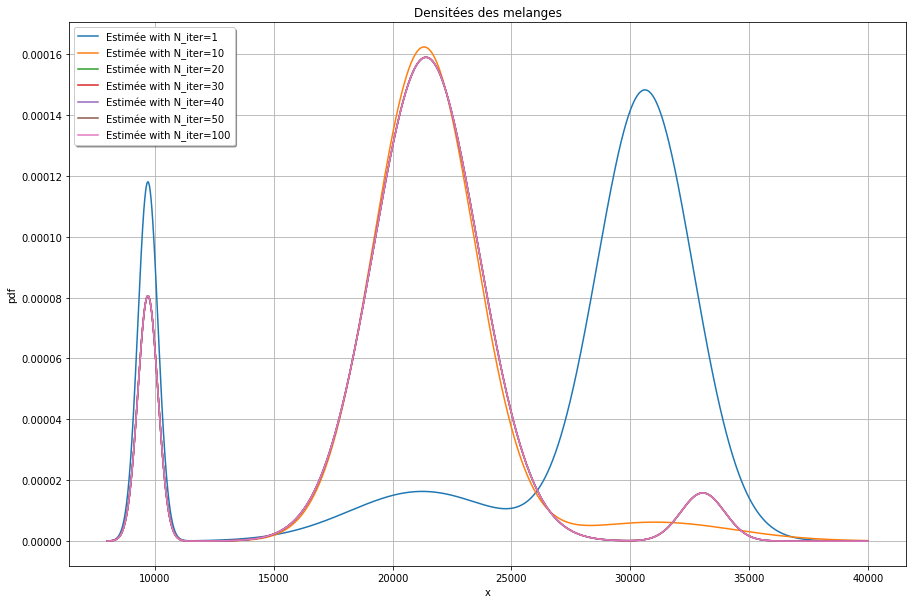

In [459]:
multi_sim_Niter([1, 10, 20, 30 ,40, 50,100], mu_em_kmeans,sigma_em_kmeans,alpha_em_test)

### Commenatire du résultat :

On remarque qu'à partir de 20 itérations les distributions générés sont quasiment les mêmes. Ainsi, on peut dire que l'algorithme converge vers la meilleure distribution des données dans un nombre d'itération de l'ordre de 20 (~$20$)

- <font color="blue"> Dans cette sous partie, on se base sur les résultats empiriques de notre propre analyse descriptive des données pour choisir les paramètres de l'algorithme EM.</font>

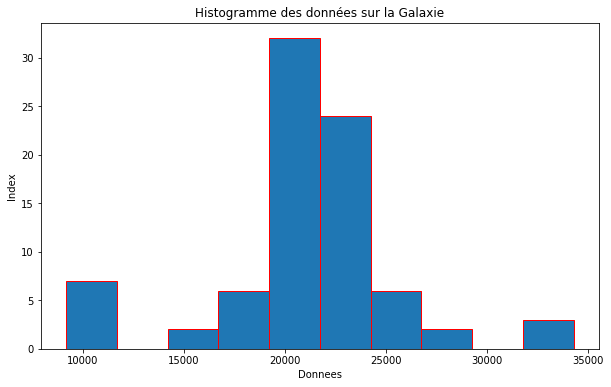

In [460]:
# On travce d'abord l'allure de l'histogramme des données
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(donnees, bins = 10, normed = False, edgecolor = "red")
plt.title('Histogramme des données sur la Galaxie')
plt.xlabel('Donnees')
plt.ylabel('Index')
plt.show()

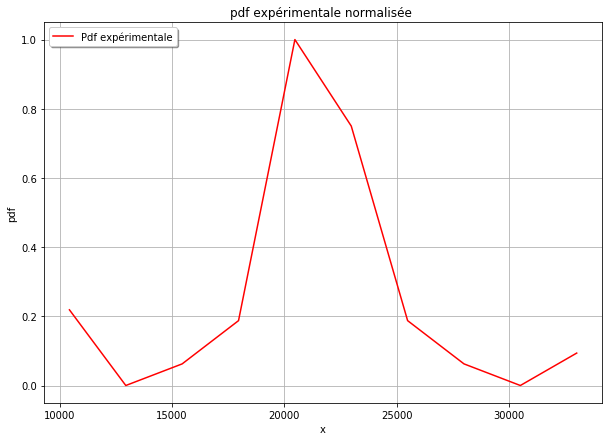

In [461]:
# Trace 

nNormalise=n/np.max(n)

C=np.zeros(shape=(len(bins)-1))
delta=bins[1]-bins[0]
debut=bins[0]+delta/2
C[0]=debut
for i in range(1,len(bins)-1,1):
    C[i]=C[i-1]+delta
plt.figure(figsize=(10,7))
plt.plot(C,nNormalise,'r-',label='Pdf expérimentale')
plt.title("pdf expérimentale normalisée ")
plt.xlabel("x")
plt.ylabel("pdf")
plt.legend(loc='upper left', shadow=True)
plt.grid()
plt.show()

- <font color = 'blue'> Commentaires :
    - à partir du graphe on peut remarqué que nous avons 3 grandes zones de données
    - Le nombre de bins de notre histogramme à été estimé en prenant la racine du nombre de données.
    - Une gaussienne avec très peu d'élements à gauche, une centrale qui donne le plus de points et la dernière qui est vers la droite.
 </font>


- <font color ='blue '>Nous avons estimé les paramètres d'initialisation de l'algorithme EM de la manière suivante à partir des données :
    
    - $\mu$ : 
        * la gaussienne du milieu : nous avons calculé la mouyenne en prenant tout les élements de la gaussienne représentée. 
        * La gaussienne de gauche, nous avons supposé que c'est une gaussienne dont nous avons juste la fin et par symétrie \n nous avons supposé que la moyenne vaut 10000.
        * Pour la gauche nous avons utilisé un raisonnement pareil. 
        
    - $\sigma$ :
      * Pour toute les gaussiennes  nous avons estimer à partir de la propriété qui nous dit que $6*\sigma$ couvre plus de 90% de la courbe normale 
    
    - $\alpha$ :
    
         * Nous avons remarqué que les gaussiennes les plus probables ont un nombre de barres plus élevé ainsi pour chaque gaussienne, nous avons calculé le ratio entre le nombre de barres dans l'histogramme qu'elle possède et le total des barres. 
     
</font>

Les paramètres estimés sont : 

Moyennes des composantes du mélange [ 9710 21403 33044]
Ecrat type des composantes du mélange [ 422.5090733  2203.80031     921.71716972]
Probabilités des composantes du mélange [0.08536529 0.87805134 0.03658337]

La somme des probabilités des composantes du mélange vaut :  0.9999999999999998


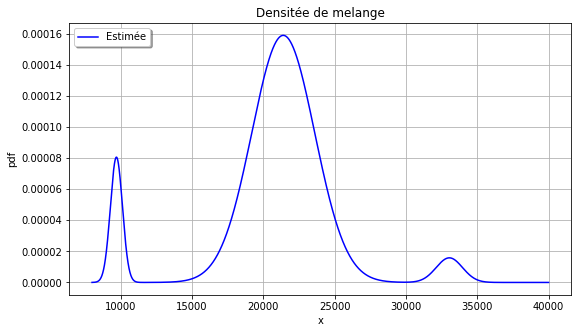

In [462]:
mu_em_test = np.array([10000, 20000, 35000])
sigma_em_test = np.array([500, 2833, 833.33])
alpha_em_test = np.array([0.125, 0.75, 0.125])
mu_em,sigma_em,alpha_em=algoEM(mu_em_test,sigma_em_test,alpha_em_test, nbMaxIterations=100)

print('Les paramètres estimés sont : ')
print('\nMoyennes des composantes du mélange', mu_em)
print('Ecrat type des composantes du mélange', sigma_em)
print('Probabilités des composantes du mélange', alpha_em)

print('\nLa somme des probabilités des composantes du mélange vaut : ', np.sum(alpha_em))

plt.figure(figsize=(9,5))
plt.title('Densitée de melange')
plt.xlabel('x')
plt.ylabel('pdf')
pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée')
plt.legend(loc='upper left', shadow=True)
plt.grid(True)
plt.show()

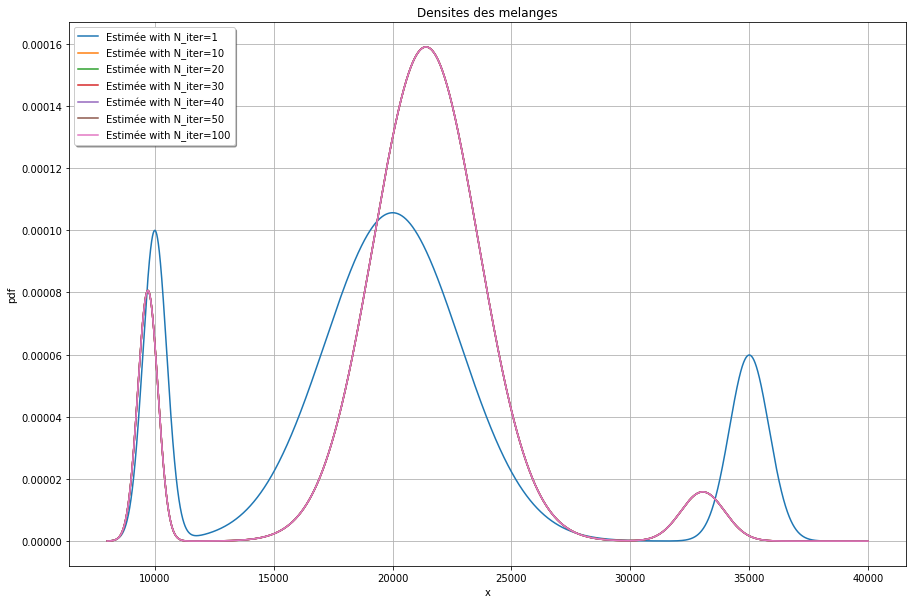

In [439]:
multi_sim_Niter([1, 10, 20, 30 ,40, 50,100], mu_em_test,sigma_em_test,alpha_em_test)

### Commenatire du résultat :

On remarque que notre initialisation empirique de l'algorithme donne de très bon résultas. En effet, on voit qu'a partir 10 itérations les distributions générés sont quasiment les mêmes. Ainsi, on peut dire que l'algorithme converge vers la meilleure distribution des données dans un nombre d'itération de l'ordre de 10 (~$10$). On peut en déduire que l'initialisation manuelle de l'algorithme peut être bonne, sous condition que les histogrammes des données permettent de distinguer des cluster dans les données. 

Ceci dit, la solution générale la plus sécurisé pour faire l'initialisation est celle avec les **KMeans**

- #### <font color="blue"> Application de l'algorithme EM de Sickit-Learn pour critiquer nos résultats et exploiter les paramètres additionnels de fournis par cette librairie:
    - <font color="blue"> En se documentant sur l'algorithme EM sur sickit learn, il s'est avéré qu'il offre plusieurs possibilités de paramétrisation de notre algorithmes dont:
        * Le choix d'une méthode d'initialisation des paramètres **init_params**, qui prend par défaut "kmeans", ce qui ressemble à ce qu'on a fait.
        * Une tolérance sur la valeur minimale de la log-vraissemblance du mélange étant donnée les données qu'on ai des galaxies, grâce au paramètre **"tol"**.
</font>

In [463]:
from sklearn.mixture import GaussianMixture

guass_mix=GaussianMixture(n_components=3,tol =1e-3, max_iter = 100, n_init = 1, warm_start = False, init_params="kmeans")  
# init_params est utilisée pour initialiser l'lgorithme en calculant les moyennes ,écart typs et poids de départ.
X_train=donnees.reshape((len(donnees), 1))
mixture=guass_mix.fit(X_train) 
# print(mixture.get_params) #Represente les paramètres utilisés dans le modèle (ceux fixés au départ et ceux par défaut)
mu_em_skl, sigma_em_skl, alpha_em_skl=mixture.means_, mixture.covariances_, mixture.weights_
mu_em_skl, sigma_em_skl = mu_em_skl.reshape((3)), np.sqrt(sigma_em_skl.reshape((3)))

Les paramètres estimés sont : 

Moyennes des composantes du mélange [21218.25925894  9709.45732827 26101.89833898]
Ecrat type des composantes du mélange [1977.54788294  422.15701072 5345.78450922]
Probabilités des composantes du mélange [0.79340383 0.08514516 0.12145101]

La somme des probabilités des composantes du mélange vaut :  1.0000000000000004


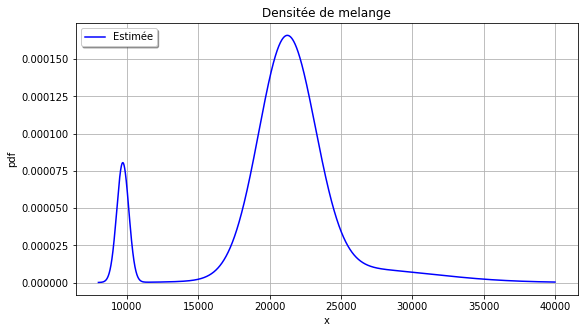

In [465]:
print('Les paramètres estimés sont : ')
print('\nMoyennes des composantes du mélange', mu_em_skl)
print('Ecrat type des composantes du mélange', sigma_em_skl)
print('Probabilités des composantes du mélange', alpha_em_skl)

print('\nLa somme des probabilités des composantes du mélange vaut : ', np.sum(alpha_em_skl))

plt.figure(figsize=(9,5))
plt.title('Densitée de melange')
plt.xlabel('x')
plt.ylabel('pdf')
pointPdfEstime = gm_pdf(x, mu_em_skl, sigma_em_skl, alpha_em_skl)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée')
plt.legend(loc='upper left', shadow=True)
plt.grid(True)
plt.show()

### Commenatire du résultat : 
On obtient bien la même distribution résultat que celle on obtenue précedemment.

In [467]:
def multi_sim_Niter_skl(list_iteration, mu_em_0=None, sigma_em_0=None, alpha_em_0=None):
    fig,ax=plt.subplots(figsize=(15,10))
    plt.title('Densitées des melanges')
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.grid(True)
    for N_iter in list_iteration:
        guass_mix=GaussianMixture(n_components=3,tol =1e-6, max_iter = N_iter, n_init = 1, warm_start = False, init_params="kmeans")
        mixture=guass_mix.fit(X_train) 
        mu_em_skl, sigma_em_skl, alpha_em_skl=mixture.means_, mixture.covariances_, mixture.weights_
        mu_em_skl, sigma_em_skl = mu_em_skl.reshape((3)), np.sqrt(sigma_em_skl.reshape((3)))
        pointPdfEstime = gm_pdf(x, mu_em_skl, sigma_em_skl, alpha_em_skl)
        plt.plot(x, pointPdfEstime, label = 'Estimée with N_iter='+str(N_iter))
        plt.legend(loc='upper left', shadow=True)
    plt.show()

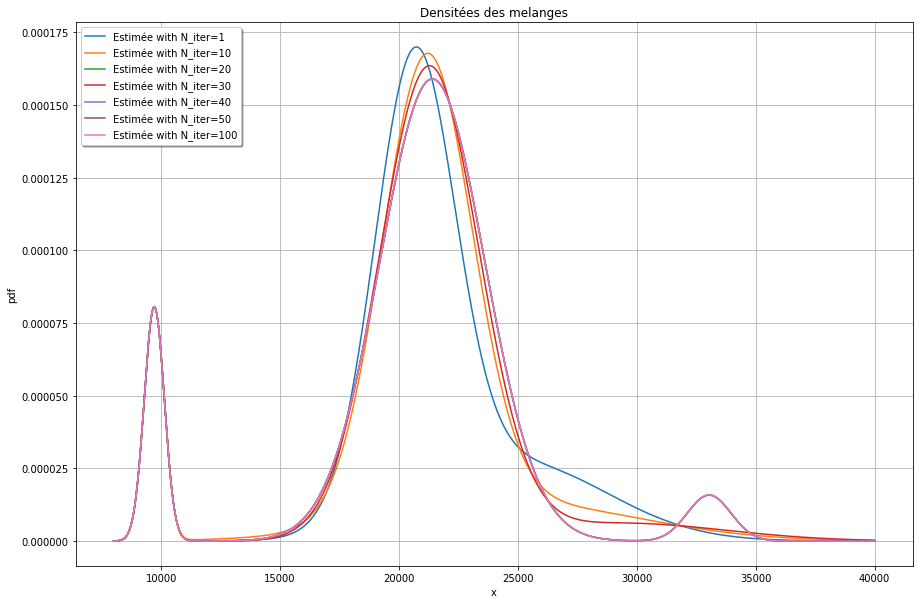

In [468]:
multi_sim_Niter_skl([1, 10, 20, 30 ,40, 50,100])

### Commenatire du résultat :

On remarque que notre initialisation empirique de l'algorithme donnait un meilleur résultat que celui de **sickit-Learn** et proche de celui où on a fait l'initialisation avec les **K-means** où les recouvrements ne commencent qu'à partir de ~20 itérations.

<font color="green">Mis à part l'argument empirique, on n'a pas utiliser d'autre moyen pour justifier le choix de nombre des composantes du mélange gaussien. En se documentant sur les moyens plus théoriques de faire ce choix, nous avon trouvé le critère **BIC**. $$BIC=−2\log(L)+K\log(n)$$ où :
$L$ : La vraissemblance de mélange gaussien, 

$N$ : Le nombre de données, 

$K$ : K est le nombre des composantes
</font>

En gros, ce critère permet de choisir le meilleur modèle parmi des modèles d'estimation, celui qui a le BIC le plus faible, mais sous l'hypothèse que les données générées sont **i.i.d**, ce qui est grossièrement le cas pour nos données.

En prenant ce critère comme base de notre choix, on effectue calcule le meilleure nombre de composantes pour notre jeu de données.

The best number of components is 3


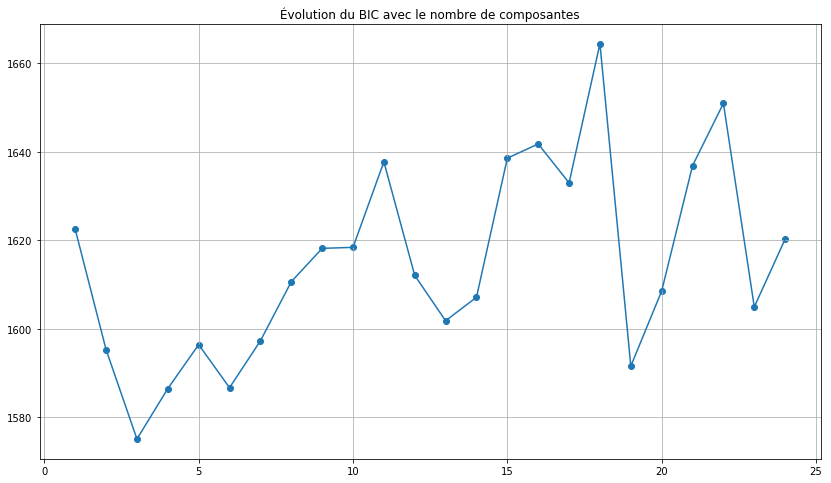

In [469]:
bics=[]
for i in range(1,25):
    guass_mix=GaussianMixture(n_components=i,tol =1e-3, max_iter = 100, n_init = 1, warm_start = False, init_params="kmeans")
    mixture=guass_mix.fit(X_train) 
    bics.append(mixture.bic(X_train))
list_mins=[i+1 for i in range(len(bics)) if bics[i]==min(bics)]
min_ind=list_mins[0]
plt.figure(figsize=(14,8))
plt.scatter(np.arange(1,25),bics)
plt.plot(np.arange(1,25),bics)
plt.grid(True)
plt.title("Évolution du BIC avec le nombre de composantes")
print("The best number of components is", min_ind)

### Commenatire du résultat :

On voit bien que selon ce critère, le meilleur nombre de composantes qu'on peut choisir pour l'algorithme EM est **3**. Ceci valide notre observation empirique et ainsi l'exactitude de nos résultats ci-dessus.